# Project 2: Data Science Salary from 2020-2023
## Vi Le
## DAT 301

### Introduction and Problem:
* Data source: https://www.kaggle.com/datasets/harishkumardatalab/data-science-salary-2021-to-2023
* Background: Data science, along with computer science, engineering, information technology, etc. are high paying jobs, not only within the US, but also world wide. Based on US Bureau of Labor Statistic, data science jobs are projected to grow 35% from 2022 to 2032 (source: https://www.bls.gov/ooh/math/data-scientists.htm). A growing career means a lot of opportunities, but also means that they are competitive. For students in their junior or senior year, or graduates, or people who want to study data science, an insight into the job market would be helpful in making the right career and education decision.
* Problems: This project is not to answer any specific questions. It gives insights into data science job market such as comparison of company sizes, experience level and salary figures. 
* Outline: what I will do
    - Step 1: Show data samples and filter out missing values (if any)
    - Step 2: Filter data to only US location, and full-time employment type
    - Step 3: Display counts in each company size categories
    - Step 4: Display counts in experience level
    - Step 5: Display counts of experience level associate with company size
    - Step 6: Compare salary figures of each year (2020 to 2023)
    - Step 7: Compare salary by company sizes
    - Step 8: Compare salary by experience levels
    - Step 9: Display top 10 salary of each job_title
    - Step 10: Display job's max and min salary
    - Step 11: Conclusion
* Data description: With a focus on various aspects of employment, this dataset provides valuable insights into salary distributions within the industry from 2020 to 2023.
    - work_year: year of salary data collection
    - experience_level: level of experience of employeess: EN (Entry), EX (Experienced), MI (Mid), SE (Senior)
    - employment_type: types of employment, FT (full-time), PT (part-time), FL (freelancer), CT (contractor)
    - job_title: job title of employees
    - salary: salary figures in respective currency formats
    - salary_currency: the currency code representing the salary
    - salary_in_usd: the converted salary figures in USD for uniform comparison
    - company_location: The location of the companies, specified as country codes
    - company_size: The size of the companies, classified as L (Large), M (Medium), and S (Small)
    
Let's get started!

### Data manipulation and analysis

### Step 1: Show data samples and filter out missing values (if any)
First, let's import necessary packages.

In [612]:
import numpy as np
import pandas as pd
import matplotlib as mplot
import matplotlib.pyplot as plt
import seaborn as sns

Next, I will import the data set and show samples of data.
The following data set is labeled as "2021_2023_DS_Salary", based on original dataset name. However, data set includes data from 2020 to 2023, not 2021 tp 2023. 

In [613]:
## Name of the data does not reflect the right year, please read above line for more information. 
df = pd.read_csv("2021_2023_DS_Salary.csv")

## First 5 rows of data set
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
2,2023,EN,FT,Data Quality Analyst,100000,USD,100000,NG,L
3,2023,EN,FT,Compliance Data Analyst,30000,USD,30000,NG,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L


In [614]:
## Stats for some data
df.describe()

,work_year,salary,salary_in_usd
count,3761.000000,3.761000e+03,3761.000000
mean,2022.374103,1.905999e+05,137555.178942
std,0.691252,6.711457e+05,63022.267974
min,2020.000000,6.000000e+03,5132.000000
25%,2022.000000,1.000000e+05,95000.000000
50%,2022.000000,1.375000e+05,135000.000000
75%,2023.000000,1.800000e+05,175000.000000
max,2023.000000,3.040000e+07,450000.000000


Let's check if there is any missing values.

In [615]:
## Count the missing value of each column
df.isna().sum()

work_year           0
experience_level    0
employment_type     0
job_title           0
salary              0
salary_currency     0
salary_in_usd       0
company_location    0
company_size        0
dtype: int64

Since there is no missing values, I skip the filtering out missing values step.

### Step 2: Filter data to only US location and full-time employment type
I will filter data set to show only jobs in the US and are full-time type only, since that is the target job market I want to know about.

In [616]:
dfus = df.loc[(df["company_location"] == "US") & (df["employment_type"] == "FT")]
dfus

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,company_location,company_size
0,2023,EN,FT,Applied Scientist,213660,USD,213660,US,L
1,2023,EN,FT,Applied Scientist,130760,USD,130760,US,L
4,2023,EN,FT,Applied Scientist,204620,USD,204620,US,L
5,2023,EN,FT,Applied Scientist,110680,USD,110680,US,L
6,2023,EN,FT,Machine Learning Engineer,163196,USD,163196,US,M
...,...,...,...,...,...,...,...,...,...
3749,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,L
3750,2020,SE,FT,Lead Data Scientist,190000,USD,190000,US,S
3754,2020,SE,FT,Data Scientist,120000,USD,120000,US,L
3758,2020,SE,FT,Data Science Manager,190200,USD,190200,US,M


### Step 3: Display counts associates with each company size

First, we will extract the information about the value counts of each company size. Since pie chart will be used to represent this information, I will turn the data needed into an array. 

In [617]:
## Extract information
size = dfus["company_size"]
size2 = size.value_counts()

## Turn information into array type for visualization
size3 = size2.to_numpy().ravel()
size2

company_size
M    2722
L     260
S      45
Name: count, dtype: int64

Then, we will use pie chart to visualize the result.

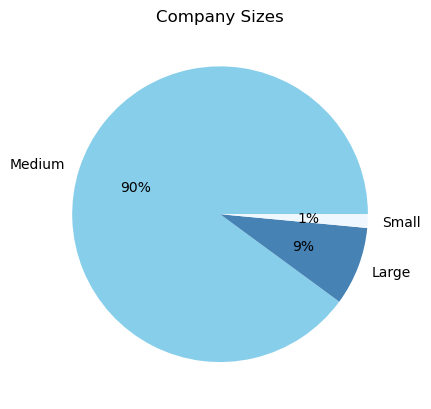

In [647]:
## plot the chart,  along with labels and title
%matplotlib inline
sizepl = plt.pie(size4, labels=["Medium", "Large", "Small"], autopct='%1.0f%%', colors=["skyblue","steelblue","aliceblue"])
plt.title("Company Sizes")

## save plot
plt.savefig("sizepl.png")

**Comments: 90% is a huge difference between medium and large and small companies. This comes with a possibility that there more jobs opportunities in medium companies than in small and large companies. Naturally, people would expect large companies to pay higher than medium and small ones. Because of this thinking, it would be much more competitive applying to larger companies, and less competitive applying to small ones.**

Let's take a look at another aspect: the experience level.

### Step 4: Display counts associate with each experience level

First, as I did in step 3, I will extract the information about the value counts of each experience level.

In [619]:
## extract informatiom
level = dfus["experience_level"]
level2 = level.value_counts()

## turn information into array type for visualization
level3 = level2.to_numpy().ravel()
level2

experience_level
SE    2261
MI     494
EN     175
EX      97
Name: count, dtype: int64

Next, we will vilsualize the result with pie chart.

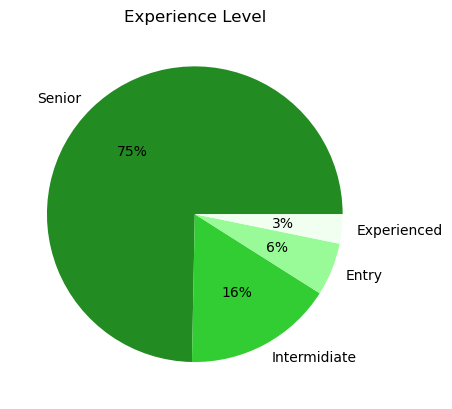

In [648]:
## plot the chart, along with labels and title
levelpl = plt.pie(level3, labels=["Senior", "Intermidiate", "Entry", "Experienced"], autopct='%1.0f%%', 
        colors=["forestgreen","limegreen","palegreen","honeydew"])
plt.title("Experience Level")

## save plot
plt.savefig("levelpl.png")

**Comments: 75% of the workers in the data set are in their senior level, while entry and experineced level are only 6% and 3%. There are many more senior level workers than entry level workers, which mean entry level workers have to compete a lot of professionals if apply to large or medium companies.**

Let's take a look at the counts of each experience level within each company type.

### Step 5: Display counts of experience level associate with company size

As in previous steps, I will extract the information from the data set.

In [621]:
## Extract desired information
leveltype1 = dfus.groupby(["experience_level", "company_size"])["job_title"].count().reset_index()
leveltype2 = leveltype1.pivot_table(index=["experience_level"], values="job_title", columns="company_size")
leveltype2

company_size,L,M,S
experience_level,,,
EN,38,122,15
EX,4,90,3
MI,60,423,11
SE,158,2087,16


Then, let's visualize this information.

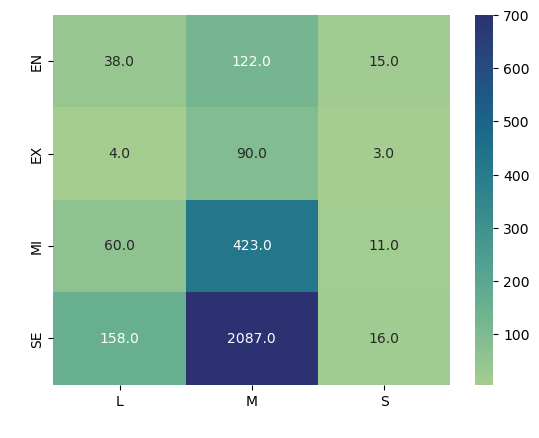

In [649]:
## Visualize the information
## Notes: the max value is 2268, but I set the max limit to 800 for more distinguish map colors
leveltype_pl = sns.heatmap(data=leveltype2, cmap="crest", annot=True, fmt=".1f", vmin=5, vmax=700)

## save plot
plt.savefig("leveltype_pl.png")

**Comment: It is understandable that there are up to 2087 senior level workers in medium company, since both categories hold the largest amount of workers. I expected there would be more entry level workers than senior workers in small companies. However, there is not much difference between the amount of entry level workers and senior or medium level workers. There could be a possibilty that small companies are not too capitous in particular experience level.**

Now that I have a better insight of company size and experience level, let's take a look at the rewarding part: salary figures.

### Step 6: Compare salary figures of each year

In step 5, instead of just extract information about value in a chosen column, we will extract information of two columns (work_year and salary), then summarize them into groups (years).

In [623]:
## extract information
salary_year = dfus[["work_year", "salary_in_usd"]]

## turn information into data frame type
salary_year2 = pd.DataFrame(salary_year)
salary_year2

,work_year,salary_in_usd
0,2023,213660
1,2023,130760
4,2023,204620
5,2023,110680
6,2023,163196
...,...,...
3749,2020,150000
3750,2020,190000
3754,2020,120000
3758,2020,190200


Then,we will visualize the result.

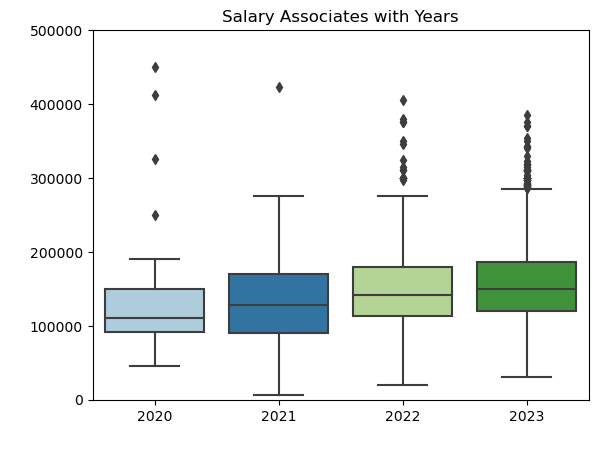

In [650]:
sy_plot = sns.boxplot(x='work_year', y='salary_in_usd', data=salary_year2, palette="Paired")
sy_plot.set_ylim(0,500000)
sy_plot.set_title("Salary Associates with Years")

## save plot
plt.savefig("sy_plot.png")

**Commment: Salary seems to be increasing each year, with smaller gap between outliers.**:

### Step 7: Display salary summary by company size

In this step, we will summarize salary figure by company size.

In [625]:
## extract information
salary_size = dfus[["company_size", "salary_in_usd"]]
salary_size2 = pd.DataFrame(salary_size)
salary_size2

,company_size,salary_in_usd
0,L,213660
1,L,130760
4,L,204620
5,L,110680
6,M,163196
...,...,...
3749,L,150000
3750,S,190000
3754,L,120000
3758,M,190200


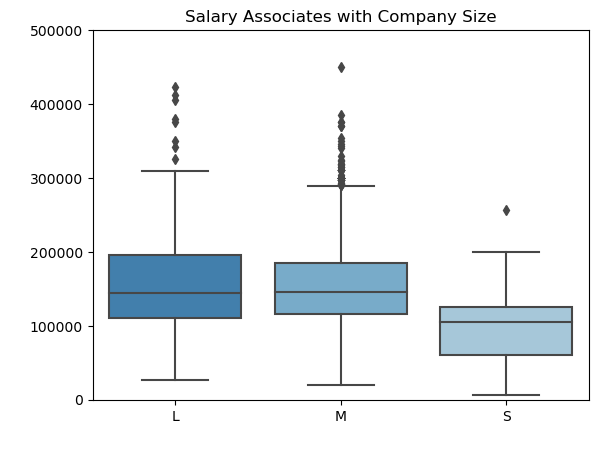

In [651]:
ss_plot = sns.boxplot(x='company_size', y='salary_in_usd', data=salary_size2, palette="tab20c")
ss_plot.set_ylim(0,500000)
ss_plot.set_title('Salary Associates with Company Size')

## save plot
plt.savefig("ss_plot.png")

### Step 8: Display salary figrues by experience level

In this ste, we group the summary of salary by experience level.

In [627]:
## extract information
salary_level = dfus[["experience_level", "salary_in_usd"]]
salary_level2 = pd.DataFrame(salary_level)
salary_level2

,experience_level,salary_in_usd
0,EN,213660
1,EN,130760
4,EN,204620
5,EN,110680
6,EN,163196
...,...,...
3749,SE,150000
3750,SE,190000
3754,SE,120000
3758,SE,190200


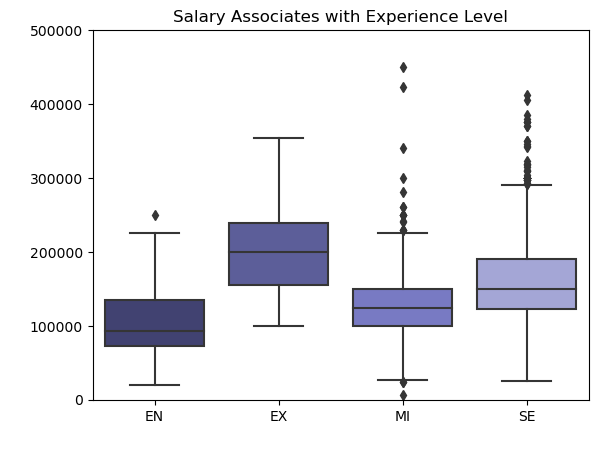

In [652]:
sl_plot = sns.boxplot(x='experience_level', y='salary_in_usd', data=salary_level2, palette="tab20b")
sl_plot.set_ylim(0,500000)
sl_plot.set_title('Salary Associates with Experience Level')

## save plot
plt.savefig("sl_plot.png")

**Comment: From this box plot, it can be seen that not only senior and medium level worker get paid higher, they also have a variety of salary figures, depending on company, since there more ouliers in these level than in other level.**

### Step 9: Display top 10 jobs (based on salary) group by experience level

In step 8, I will display top 10 jobs for each experience level, in descending order.

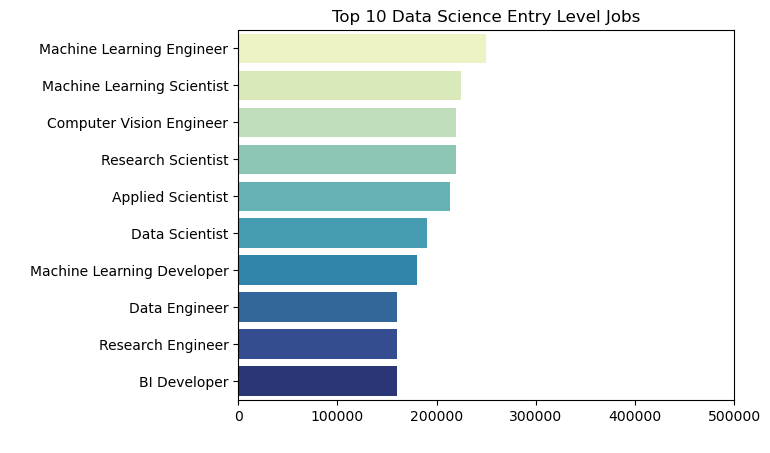

In [653]:
## extract information and filter data
job = pd.DataFrame(dfus[["job_title", "salary_in_usd", "experience_level"]])
job_en = job[job["experience_level"] == 'EN']
job_en = job_en.sort_values('salary_in_usd', ascending=False).drop_duplicates(subset=['job_title']).head(10)

## visualize information
job_enpl = sns.barplot(data=job_en, x="salary_in_usd", y="job_title", orient="h", palette="YlGnBu")
job_enpl.set_xlim(0,500000)
job_enpl.set_title("Top 10 Data Science Entry Level Jobs")

## save plot
plt.savefig("job_enpl.png")

Next, based on the result, I will group the data by experience level.

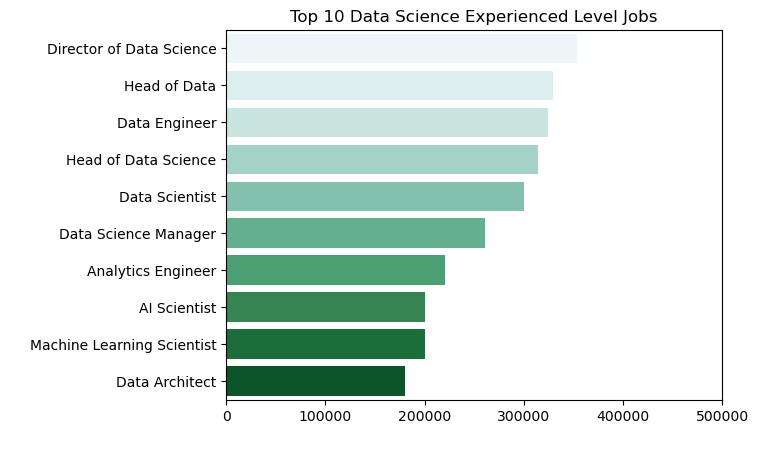

In [654]:
## extract and filter data
job_ex = job[job["experience_level"] == "EX"]
job_ex = job_ex.sort_values('salary_in_usd', ascending=False).drop_duplicates(subset=['job_title']).head(10)

## visualize information extracted
job_expl = sns.barplot(data=job_ex, x="salary_in_usd", y="job_title", orient="h", palette="BuGn")
job_expl.set_xlim(0,500000)
job_expl.set_title("Top 10 Data Science Experienced Level Jobs")

## save plot
plt.savefig("job_expl.png")

Text(0.5, 1.0, 'Top 10 Data Science Intermidate Level Jobs')

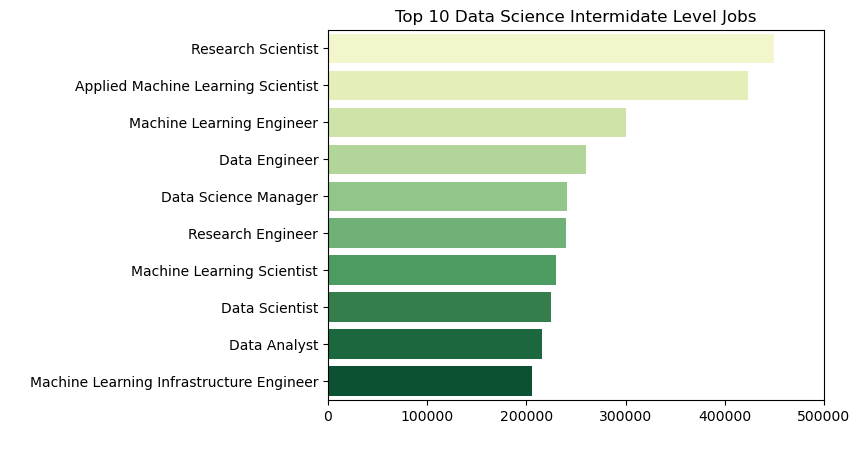

In [631]:
## extract and filter data
job_mi = job[job["experience_level"] == "MI"]
job_mi = job_mi.sort_values('salary_in_usd', ascending=False).drop_duplicates(subset=['job_title']).head(10)

## visualize information extracted
job_mipl = sns.barplot(data=job_mi, x="salary_in_usd", y="job_title", orient="h", palette="YlGn")
job_mipl.set_xlim(0,500000)
job_mipl.set_title("Top 10 Data Science Intermidate Level Jobs")

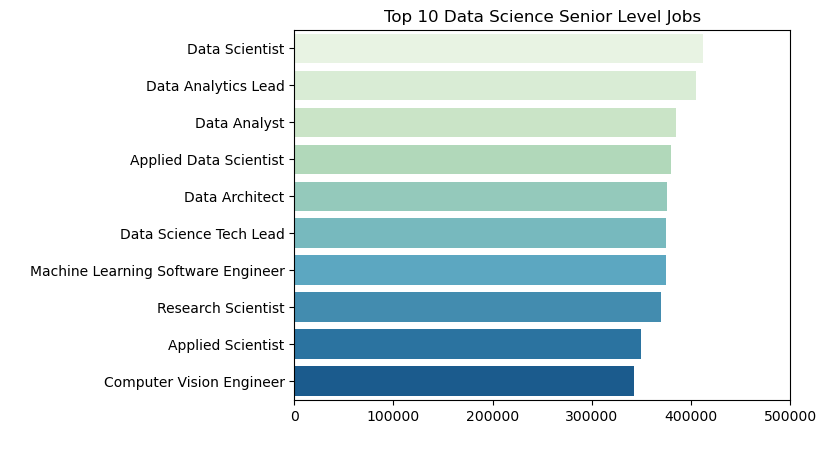

In [655]:
## extract and filter data
job_se = job[job["experience_level"] == "SE"]
job_se = job_se.sort_values('salary_in_usd', ascending=False).drop_duplicates(subset=['job_title']).head(10)

## visualize information extracted
job_sepl = sns.barplot(data=job_se, x="salary_in_usd", y="job_title", orient="h", palette="GnBu")
job_sepl.set_xlim(0,500000)
job_sepl.set_title("Top 10 Data Science Senior Level Jobs")

## save plot
plt.savefig("job_sepl.png")

**Comment: From the bar plots above, it is clear that there is not much difference of salary among jobs of senior level. It is possible that other levels show big difference among different jobs because of company's size. But when it comes to senior level with a lot of experience, the salary is high no matter the size of company.**

### Step 10: Display job's max and min salary

In this step, I will display each job's maximum and minimum salary, and create 2 tables from this. The first table would be top 20, sort by maximum salary. The second table would be bottom 20, sort by max salary. 

In [634]:
## extract and filter data
job_com = dfus[["job_title", "salary_in_usd"]]
job_com1 = job_com.groupby("job_title").max().sort_values("salary_in_usd", ascending=False)
job_com2 = job_com.groupby("job_title").min()

## Only show top 10 jobs, based on max salary
job_join = pd.merge(job_com1, job_com2, on="job_title").head(20)
job_join

,salary_in_usd_x,salary_in_usd_y
job_title,,
Research Scientist,450000,50000
Applied Machine Learning Scientist,423000,38400
Data Scientist,412000,5679
Data Analytics Lead,405000,405000
Data Analyst,385000,20000
Applied Data Scientist,380000,157000
Data Architect,376080,63000
Data Science Tech Lead,375000,375000
Machine Learning Software Engineer,375000,90000


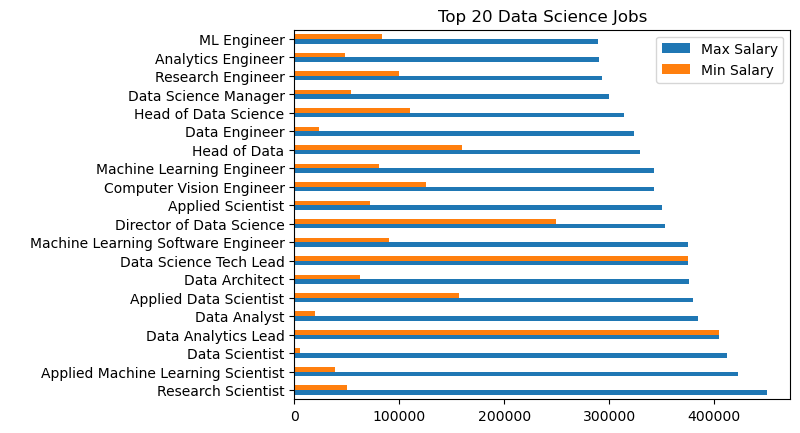

In [656]:
## plot data, with max and min salary side by side for comparision
job_joinpl = job_join.plot.barh()
job_joinpl.legend(["Max Salary", "Min Salary"])
job_joinpl.set_title("Top 20 Data Science Jobs")

## save plot
plt.savefig("job_joinpl.png")

**Comment: There are big differences between max and min salary of these jobs, except for Data Science Tech Lead, and Data Analytics Lead. Let's take a detail look at these 2 jobs.**

In [636]:
re = dfus[["job_title", "company_size", "salary"]]
re1 = re[re["job_title"] == "Data Science Tech Lead"]
re1

,job_title,company_size,salary
2685,Data Science Tech Lead,L,375000


In [637]:
re2 = re[re["job_title"] == "Data Analytics Lead"]
re2

,job_title,company_size,salary
3449,Data Analytics Lead,L,405000


**From those results, the reason there is no difference between max and min salary is there is only one salary value, meaning max value is also min value.**

Next, I will display the bottom 10 jobs based on max salary, with max and min salary for comparison.

In [638]:
## extract and filter data
job_com_re = dfus[["job_title", "salary_in_usd"]]
job_com_re1 = job_com_re.groupby("job_title").max().sort_values("salary_in_usd", ascending=True)
job_com_re2 = job_com_re.groupby("job_title").min()

## Only show top 10 jobs, based on max salary
job_join2 = pd.merge(job_com_re1, job_com_re2, on="job_title").head(20)
job_join2 = pd.DataFrame(job_join2)
job_join2

,salary_in_usd_x,salary_in_usd_y
job_title,,
BI Data Engineer,60000,60000
Big Data Engineer,70000,70000
Computer Vision Software Engineer,95746,70000
Data Quality Analyst,100000,64980
Data Analytics Specialist,105000,85000
Data Analytics Consultant,113000,113000
Data Operations Analyst,123000,66000
Manager Data Management,125000,125000
Financial Data Analyst,130000,75000


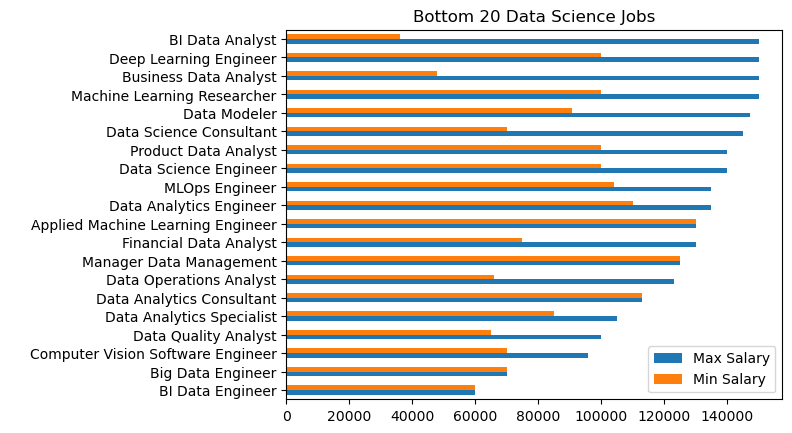

In [657]:
## plot data, with max and min salary side by side for comparision
job_join2pl = job_join2.plot.barh()
job_join2pl.legend(["Max Salary", "Min Salary"])
job_join2pl.set_title("Bottom 20 Data Science Jobs")

## save plot
plt.savefig("job_join2pl.png")

**Comment: In this bar plot, there are some jobs have no difference between max and min values. Let's take a look at these jobs.**

In [640]:
re3 = re[re["job_title"] == "Applied Machine Learning Engineer"]
re3

,job_title,company_size,salary
371,Applied Machine Learning Engineer,M,130000


In [641]:
re4 = re[re["job_title"] == "Manager Data Management"]
re4

,job_title,company_size,salary
2323,Manager Data Management,L,125000


In [642]:
re5 = re[re["job_title"] == "Data Analytics Consultant"]
re5

,job_title,company_size,salary
2181,Data Analytics Consultant,L,113000


**Based on details look from top 20 and bottom 20, jobs that have no difference between max and min salary are the unique job titles. Most of them are from large companies. 
With this insight, it is possible that the more jobs on the market, the more varied the salary would be.**

Let's count the job titles to see if that possibilty is correct.

In [643]:
## count the job titles, sort by count values
job = dfus.groupby(["job_title"])["job_title"].count().sort_values(ascending=True)

## show first 10 job counts
job.head(10)

job_title
AI Developer                  1
Manager Data Management       1
Machine Learning Developer    1
Principal Data Analyst        1
Data Analytics Lead           1
Data Analytics Consultant     1
Data Science Tech Lead        1
Cloud Data Architect          1
Data Scientist Lead           1
Big Data Engineer             1
Name: job_title, dtype: int64

In [644]:
## show last 10 job counts
job.tail(10)

job_title
Research Engineer             31
Data Science Manager          52
Applied Scientist             58
Research Scientist            58
Analytics Engineer            92
Data Architect                97
Machine Learning Engineer    221
Data Analyst                 522
Data Scientist               673
Data Engineer                906
Name: job_title, dtype: int64

**As shown above, jobs that have no difference between max and min values are included in top 10 job counts, while jobs that have a huge difference between max and min values are in the bottom 10 job counts.**

### Conclusion:
Here are a few things I conclude for myself:
* Even if in small companies, it might be still competitive for entry level job seekers to apply.
* Data science salary seems to increase every year.
* The more unique the job, the less varied the salary. On the contrary, the more the job counts, the more varied the salary, depending on the company. 
* Unique jobs seems to only happen in large companies, mostly supervisory positions.
* For an entry level position seekers, it is best to search for jobs listed in bottom 10 job counts, since there would be more job postings and more opportunities. 

## Thank you for reading!